<a href="https://colab.research.google.com/github/sreeragnv/DSLAB/blob/main/Exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a Pandas DataFrame object using the given dataset

In [ ]:
import pandas as pd
data=pd.read_csv('reviews.csv')
df=pd.DataFrame(data);
print(df)

    customer_id  product_id customer_name product_name  rating  \
0             1         101         Alice    Product A     4.0   
1             2         102           Bob    Product B     5.0   
2             3         103       Charlie    Product A     3.0   
3             4         104         David    Product C     5.0   
4             5         105           Eve    Product B     2.0   
5             6         106         Frank    Product A     4.0   
6             7         107         Grace    Product D     5.0   
7             8         108         Henry    Product C     4.0   
8             9         109           Ivy    Product B     1.0   
9            10         110          Jack    Product A     5.0   
10           11         111         Karen    Product D     4.0   
11           12         112          Liam    Product B     5.0   
12           13         113           Mia    Product C     3.0   
13           14         114          Noah    Product A     5.0   
14        

Display the first five rows and last three rows of the dataset.

In [ ]:
print(df.head(5))
print(df.tail(3))

   customer_id  product_id customer_name product_name  rating  \
0            1         101         Alice    Product A     4.0   
1            2         102           Bob    Product B     5.0   
2            3         103       Charlie    Product A     3.0   
3            4         104         David    Product C     5.0   
4            5         105           Eve    Product B     2.0   

                                      review_comment  order_date order_time  \
0            The product works great. I'm satisfied.  2023-01-10   14:30:00   
1             Excellent product! Highly recommended.  2023-01-12   09:45:00   
2            Good product, but it could be improved.  2023-01-15   16:20:00   
3  I love this product. It exceeded my expectations.  2023-01-17   11:55:00   
4      Not happy with the quality. It broke quickly.  2023-01-20   13:40:00   

   order_quantity  is_returned payment_method  total_price  
0               2            0    Credit Card        59.98  
1           

Get the dimensions (number of rows and columns) of the dataset.

In [ ]:
print(df.shape)

(53, 12)


Generate descriptive statistics (mean, median, standard deviation, five-point summary,
IQR, etc.) for the data and find the correlation coefficient between rating and total price
ignoring the missing values.

In [ ]:
statisti=df.describe()
correlation=df['rating'].corr(df['total_price'],method='pearson')
print(statisti)
print('Median',df.median())
print("IQR:",statisti.loc['75%']-statisti.loc['25%'])
print('Correleation coefficient{}',correlation)

       customer_id  product_id     rating  order_quantity  is_returned  \
count    53.000000   53.000000  52.000000       53.000000    53.000000   
mean     27.000000  127.000000   3.750000        1.603774     0.075472   
std      15.443445   15.443445   1.412479        0.742647     0.266679   
min       1.000000  101.000000   0.000000        1.000000     0.000000   
25%      14.000000  114.000000   3.000000        1.000000     0.000000   
50%      27.000000  127.000000   4.000000        1.000000     0.000000   
75%      40.000000  140.000000   5.000000        2.000000     0.000000   
max      53.000000  153.000000   7.000000        3.000000     1.000000   

       total_price  
count    40.000000  
mean     61.984500  
std      30.498038  
min      19.990000  
25%      39.990000  
50%      54.990000  
75%      82.485000  
max     149.970000  
Median customer_id        27.00
product_id        127.00
rating              4.00
order_quantity      1.00
is_returned         0.00
total_price 

<ipython-input-3-b8e32a549c17>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('Median',df.median())


Print a concise summary of the dataset, including information on data types and
missing values.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     53 non-null     int64  
 1   product_id      53 non-null     int64  
 2   customer_name   53 non-null     object 
 3   product_name    53 non-null     object 
 4   rating          52 non-null     float64
 5   review_comment  50 non-null     object 
 6   order_date      53 non-null     object 
 7   order_time      53 non-null     object 
 8   order_quantity  53 non-null     int64  
 9   is_returned     53 non-null     int64  
 10  payment_method  53 non-null     object 
 11  total_price     40 non-null     float64
dtypes: float64(2), int64(4), object(6)
memory usage: 5.1+ KB
None


Add a new column named "unit_price" and insert values by calculating the total price
divided by the order quantity.

In [ ]:
df['unit_price']=df['total_price']/df['order_quantity']

Create three new instances synthetically and add them to the dataset.

In [ ]:
import numpy as np
random_instances = {
    'customer_id': np.random.randint(1000, 9999, 3),
    'product_id': np.random.randint(100, 999, 3),
    'customer_name': [''.join(np.random.choice(list('abcdefghijklmnopqrstuvwxyz'), 5)) for _ in range(3)],
    'product_name': [''.join(np.random.choice(list('abcdefghijklmnopqrstuvwxyz'), 8)) for _ in range(3)],
    'rating': np.random.randint(1, 6, 3),
    'review_comment': [''.join(np.random.choice(list('abcdefghijklmnopqrstuvwxyz '), 20)) for _ in range(3)],
    'order_date': pd.to_datetime(np.random.choice(pd.date_range('2023-01-01', '2023-12-31'), 3)).strftime('%Y-%m-%d'),
    'order_time': pd.to_datetime(np.random.choice(pd.date_range('2023-01-01', '2023-12-31', freq='H'), 3)).strftime('%H:%M:%S'),
    'order_quantity': np.random.randint(1, 50, 3),
    'is_returned': np.random.choice([0, 1], 3),
    'payment_method': np.random.choice(['Credit Card', 'PayPal', 'Cash'], 3),
    'total_price': np.random.uniform(10, 500, 3),
    'unit_price': np.random.uniform(1, 50, 3)
}
new_data = pd.DataFrame(random_instances)
df = df.append(new_data, ignore_index=True)
print(df)

    customer_id  product_id customer_name product_name  rating  \
0             1         101         Alice    Product A     4.0   
1             2         102           Bob    Product B     5.0   
2             3         103       Charlie    Product A     3.0   
3             4         104         David    Product C     5.0   
4             5         105           Eve    Product B     2.0   
5             6         106         Frank    Product A     4.0   
6             7         107         Grace    Product D     5.0   
7             8         108         Henry    Product C     4.0   
8             9         109           Ivy    Product B     1.0   
9            10         110          Jack    Product A     5.0   
10           11         111         Karen    Product D     4.0   
11           12         112          Liam    Product B     5.0   
12           13         113           Mia    Product C     3.0   
13           14         114          Noah    Product A     5.0   
14        

<ipython-input-7-7e2795564f28>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_data, ignore_index=True)


In [ ]:
print(df)

    customer_id  product_id customer_name product_name  rating  \
0             1         101         Alice    Product A     4.0   
1             2         102           Bob    Product B     5.0   
2             3         103       Charlie    Product A     3.0   
3             4         104         David    Product C     5.0   
4             5         105           Eve    Product B     2.0   
5             6         106         Frank    Product A     4.0   
6             7         107         Grace    Product D     5.0   
7             8         108         Henry    Product C     4.0   
8             9         109           Ivy    Product B     1.0   
9            10         110          Jack    Product A     5.0   
10           11         111         Karen    Product D     4.0   
11           12         112          Liam    Product B     5.0   
12           13         113           Mia    Product C     3.0   
13           14         114          Noah    Product A     5.0   
14        

Delete the newly inserted three instances from the dataset.

In [ ]:
df=df[:-3]

Update Lucas's payment method to "Debit Card" provided it is currently set to "Credit
Card."

In [ ]:
df.loc[df['customer_name']=='Lucas','payment_method']='Debit Card'

Find the names of customers who have ordered product A and rated it at least 2.
Also, find the total price for each of these customers and calculate the mean, median,
and standard deviation of the total price.

In [ ]:
filtered_df = df[(df['product_name'] == 'Product A') & (df['rating'] >= 2)]
total_price_per_customer = filtered_df.groupby('customer_name')['total_price'].sum()
print("Names of customers who ordered Product A and rated it at least 2:")
print(filtered_df['customer_name'])
print('Mean:',total_price_per_customer.mean())
print('Median:',total_price_per_customer.median())
print('Standard deviation:',total_price_per_customer.std())

Names of customers who ordered Product A and rated it at least 2:
0       Alice
2     Charlie
5       Frank
9        Jack
13       Noah
16       Emma
20        Ava
23       Liam
26    William
29        Ava
32    Michael
35     Oliver
39      James
42     George
44      Isaac
48        Mia
51    Patrick
Name: customer_name, dtype: object
Mean: 54.046875
Median: 49.985
Standard deviation: 45.493055252972404


Find the names and dates of orders of customers who have returned items.

In [ ]:
returned_df = df[df['is_returned']==1]
print(returned_df[['customer_name','order_date']])

   customer_name  order_date
2        Charlie  2023-01-15
11          Liam  2023-01-16
14        Olivia  2023-01-21
19         James  2023-02-05


Perform data cleaning by:
(a) Deleting duplicate rows.
(b) Replacing missing rating values with the average rating of the respective product
category.
(c) Adding the value "unknown" for missing review comments.
(d) Adding the missing total_price values by calculating the product of average unit
price and quantity ordered.

In [ ]:
print(df.drop_duplicates())

    customer_id  product_id customer_name product_name  rating  \
0             1         101         Alice    Product A     4.0   
1             2         102           Bob    Product B     5.0   
2             3         103       Charlie    Product A     3.0   
3             4         104         David    Product C     5.0   
4             5         105           Eve    Product B     2.0   
5             6         106         Frank    Product A     4.0   
6             7         107         Grace    Product D     5.0   
7             8         108         Henry    Product C     4.0   
8             9         109           Ivy    Product B     1.0   
9            10         110          Jack    Product A     5.0   
10           11         111         Karen    Product D     4.0   
11           12         112          Liam    Product B     5.0   
12           13         113           Mia    Product C     3.0   
13           14         114          Noah    Product A     5.0   
14        

In [ ]:
average_ratings = df.groupby('product_name')['rating'].mean()
df['rating'].fillna(df['product_name'].map(average_ratings), inplace=True)

In [ ]:
print(df[df['customer_id']==42])

    customer_id  product_id customer_name product_name  rating review_comment  \
41           42         142          Finn    Product D     4.1            NaN   

    order_date order_time  order_quantity  is_returned payment_method  \
41  2023-04-07   14:30:00               1            0    Credit Card   

    total_price  unit_price  
41          NaN         NaN  


In [ ]:
df['review_comment'].fillna('unknown', inplace=True)

In [ ]:
print(df[df['customer_id']==20])

    customer_id  product_id customer_name product_name  rating review_comment  \
19           20         120         James    Product C     1.0        unknown   

    order_date order_time  order_quantity  is_returned payment_method  \
19  2023-02-05   17:20:00               1            1         PayPal   

    total_price  unit_price  
19        19.99       19.99  


In [ ]:
average_unit_prices = df.groupby('product_name')['unit_price'].mean()
missing_total_prices = df['order_quantity'] * df['product_name'].map(average_unit_prices)

df['total_price'].fillna(missing_total_prices, inplace=True)

In [ ]:
print(df[df['customer_id']==31])

    customer_id  product_id customer_name product_name  rating  \
30           31         131         Lucas    Product B     3.0   

                            review_comment  order_date order_time  \
30  Not bad, but there are better options.  2023-03-06   14:40:00   

    order_quantity  is_returned payment_method  total_price  unit_price  
30               3            0     Debit Card       149.97       49.99  


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['MinMax-score']=scaler.fit_transform(df[['total_price']])
print(df)

    customer_id  product_id customer_name product_name  rating  \
0             1         101         Alice    Product A     4.0   
1             2         102           Bob    Product B     5.0   
2             3         103       Charlie    Product A     3.0   
3             4         104         David    Product C     5.0   
4             5         105           Eve    Product B     2.0   
5             6         106         Frank    Product A     4.0   
6             7         107         Grace    Product D     5.0   
7             8         108         Henry    Product C     4.0   
8             9         109           Ivy    Product B     1.0   
9            10         110          Jack    Product A     5.0   
10           11         111         Karen    Product D     4.0   
11           12         112          Liam    Product B     5.0   
12           13         113           Mia    Product C     3.0   
13           14         114          Noah    Product A     5.0   
14        

Find the normalized total price values by performing:
(a) Z-score normalization.
(b) Min-max normalization.
(c) Decimal scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Total Price (Z-Score)'] = scaler.fit_transform(df[['total_price']])
print(df)

    customer_id  product_id customer_name product_name  rating  \
0             1         101         Alice    Product A     4.0   
1             2         102           Bob    Product B     5.0   
2             3         103       Charlie    Product A     3.0   
3             4         104         David    Product C     5.0   
4             5         105           Eve    Product B     2.0   
5             6         106         Frank    Product A     4.0   
6             7         107         Grace    Product D     5.0   
7             8         108         Henry    Product C     4.0   
8             9         109           Ivy    Product B     1.0   
9            10         110          Jack    Product A     5.0   
10           11         111         Karen    Product D     4.0   
11           12         112          Liam    Product B     5.0   
12           13         113           Mia    Product C     3.0   
13           14         114          Noah    Product A     5.0   
14        

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Total Price (Min-Max)'] = scaler.fit_transform(df[['total_price']])
print(df)

    customer_id  product_id customer_name product_name  rating  \
0             1         101         Alice    Product A     4.0   
1             2         102           Bob    Product B     5.0   
2             3         103       Charlie    Product A     3.0   
3             4         104         David    Product C     5.0   
4             5         105           Eve    Product B     2.0   
5             6         106         Frank    Product A     4.0   
6             7         107         Grace    Product D     5.0   
7             8         108         Henry    Product C     4.0   
8             9         109           Ivy    Product B     1.0   
9            10         110          Jack    Product A     5.0   
10           11         111         Karen    Product D     4.0   
11           12         112          Liam    Product B     5.0   
12           13         113           Mia    Product C     3.0   
13           14         114          Noah    Product A     5.0   
14        

In [ ]:
max_value = df['total_price'].abs().max()
num_decimals = len(str(int(max_value)))
divisor = 10 ** num_decimals
df['Total Price (Decimal Scaling)'] = df['total_price'] / divisor
print(df)

    customer_id  product_id customer_name product_name  rating  \
0             1         101         Alice    Product A     4.0   
1             2         102           Bob    Product B     5.0   
2             3         103       Charlie    Product A     3.0   
3             4         104         David    Product C     5.0   
4             5         105           Eve    Product B     2.0   
5             6         106         Frank    Product A     4.0   
6             7         107         Grace    Product D     5.0   
7             8         108         Henry    Product C     4.0   
8             9         109           Ivy    Product B     1.0   
9            10         110          Jack    Product A     5.0   
10           11         111         Karen    Product D     4.0   
11           12         112          Liam    Product B     5.0   
12           13         113           Mia    Product C     3.0   
13           14         114          Noah    Product A     5.0   
14        

Create a new DataFrame from the given dataset with the following features:
- Customer name
- Product name
- Total price discretized by equal-frequency binning of the original data
- Rating.

In [ ]:
new_df = df[['customer_name', 'product_name', 'rating']].copy()
num_bins = 3
new_df['Total price discretized'] = pd.qcut(df['total_price'], q=num_bins, labels=False)
print(new_df)

   customer_name product_name  rating  Total price discretized
0          Alice    Product A     4.0                        1
1            Bob    Product B     5.0                        0
2        Charlie    Product A     3.0                        2
3          David    Product C     5.0                        0
4            Eve    Product B     2.0                        1
5          Frank    Product A     4.0                        0
6          Grace    Product D     5.0                        1
7          Henry    Product C     4.0                        2
8            Ivy    Product B     1.0                        0
9           Jack    Product A     5.0                        2
10         Karen    Product D     4.0                        2
11          Liam    Product B     5.0                        1
12           Mia    Product C     3.0                        2
13          Noah    Product A     5.0                        0
14        Olivia    Product C     2.0                  

Create a new DataFrame from the given dataset with the features:
- Customer name
- One-hot encoded rating.

In [ ]:
rating_encoded = pd.get_dummies(df['rating'], prefix='rating')
new_df = pd.concat([df['customer_name'], rating_encoded], axis=1)
print(new_df)

   customer_name  rating_0.0  rating_1.0  rating_2.0  rating_3.0  rating_4.0  \
0          Alice           0           0           0           0           1   
1            Bob           0           0           0           0           0   
2        Charlie           0           0           0           1           0   
3          David           0           0           0           0           0   
4            Eve           0           0           1           0           0   
5          Frank           0           0           0           0           1   
6          Grace           0           0           0           0           0   
7          Henry           0           0           0           0           1   
8            Ivy           0           1           0           0           0   
9           Jack           0           0           0           0           0   
10         Karen           0           0           0           0           1   
11          Liam           0           0

In [ ]:
df2=df[["customer_name"]].copy()
df2["discrete"]=pd.qcut(df["total_price"],q=3,labels=False)
print(df2)

   customer_name  discrete
0          Alice         1
1            Bob         0
2        Charlie         2
3          David         0
4            Eve         1
5          Frank         0
6          Grace         1
7          Henry         2
8            Ivy         0
9           Jack         2
10         Karen         2
11          Liam         1
12           Mia         2
13          Noah         0
14        Olivia         0
15         Oscar         2
16          Emma         1
17       William         1
18        Sophia         2
19         James         0
20           Ava         2
21         Lucas         2
22      Isabella         0
23          Liam         0
24        Olivia         1
25          Emma         1
26       William         2
27        Sophia         1
28         James         0
29           Ava         1
30         Lucas         2
31      Isabella         0
32       Michael         2
33     Charlotte         0
34          Liam         0
35        Oliver         2
3

In [ ]:
df3=pd.get_dummies(df["rating"],prefix="custom_")
df3=pd.concat([df["rating"],df3],axis=1)
print(df3)

    rating  custom__0.0  custom__1.0  custom__2.0  custom__3.0  custom__4.0  \
0      4.0            0            0            0            0            1   
1      5.0            0            0            0            0            0   
2      3.0            0            0            0            1            0   
3      5.0            0            0            0            0            0   
4      2.0            0            0            1            0            0   
5      4.0            0            0            0            0            1   
6      5.0            0            0            0            0            0   
7      4.0            0            0            0            0            1   
8      1.0            0            1            0            0            0   
9      5.0            0            0            0            0            0   
10     4.0            0            0            0            0            1   
11     5.0            0            0            0   

<Axes: xlabel='total_price', ylabel='rating'>

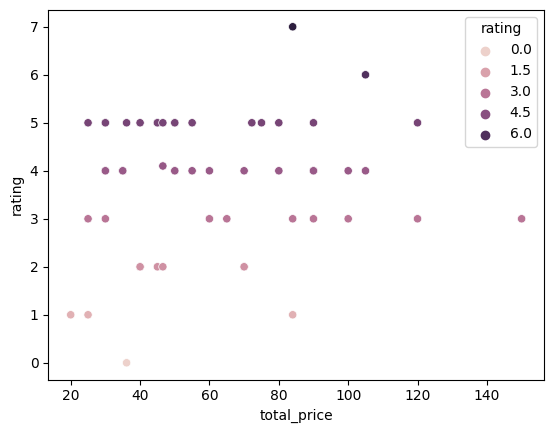

In [ ]:
import matplotlib as plt
import seaborn as sns
sns.scatterplot(data=df,x='total_price',y ='rating',hue='rating')